In [224]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [225]:
df_2 = pd.read_csv('Churn_Modelling.csv')
df = df_2.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [227]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [228]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [229]:
df = df.drop(['RowNumber', 'CustomerId'], axis = 1)

In [230]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [231]:
df.shape

(10000, 12)

   France  Germany  Spain
0    5014     2509   2477


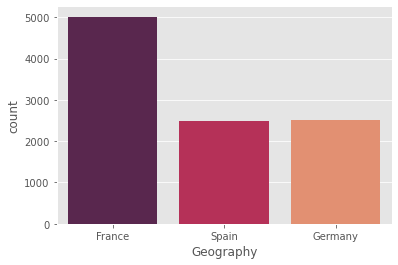

In [232]:
plt.style.use('ggplot')
country_plot = sns.countplot(data = df, x= "Geography", palette= "rocket")
geography_df = pd.DataFrame({"France": [df[ df['Geography'] == "France"].shape[0]], 
                            "Germany" : [df[ df['Geography'] == "Germany"].shape[0]],
                             "Spain" : [df[ df['Geography'] == "Spain"].shape[0]]})
print(geography_df)

Number of male customers: 5457
Number of female customers: 4543
Difference between number of customers by gender:  914


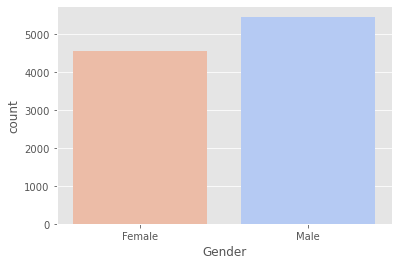

In [233]:
sns.countplot(data = df, x = "Gender", palette = "coolwarm_r")
print("Number of male customers:", df[ df['Gender'] == "Male"].shape[0])
print("Number of female customers:", df[ df['Gender'] == "Female"].shape[0])
difference_between_genders = np.abs(df[ df['Gender'] == "Male"].shape[0] - df[ df['Gender'] == "Female"].shape[0])
print("Difference between number of customers by gender: ", difference_between_genders)

Text(0.5, 1.0, 'Company has customers from all economic conditions. \nDistribution is close to uniform distribution')

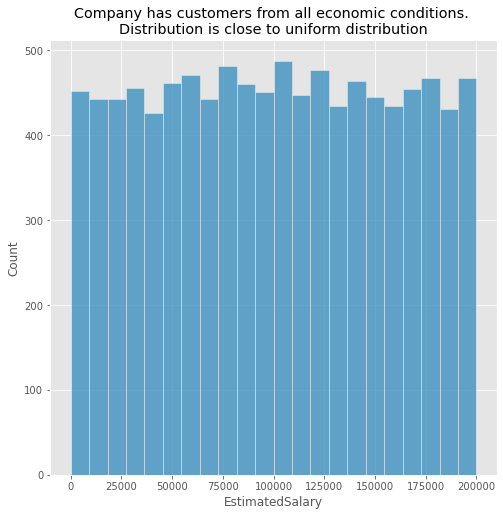

In [234]:
plt.figure(figsize=(8,8))
sns.histplot(data = df, x = df['EstimatedSalary']).set_title('Company has customers from all economic conditions. \nDistribution is close to uniform distribution')

In [235]:
print(df.groupby('Gender').agg({'EstimatedSalary':'mean'}).T)
print("-------------------------------------------------------------------")
print("                        AVERAGE SALARY BY GENDER")

Gender                  Female          Male
EstimatedSalary  100601.541382  99664.576931
-------------------------------------------------------------------
                        AVERAGE SALARY BY GENDER


In [236]:
print(df.groupby('Geography').agg({'EstimatedSalary':'mean'}).T)
print("-------------------------------------------------------------------")
print("                        AVERAGE SALARY PER COUNTRY")

Geography              France        Germany         Spain
EstimatedSalary  99899.180814  101113.435102  99440.572281
-------------------------------------------------------------------
                        AVERAGE SALARY PER COUNTRY


<AxesSubplot:title={'center':'Most of customers which are exited are female'}>

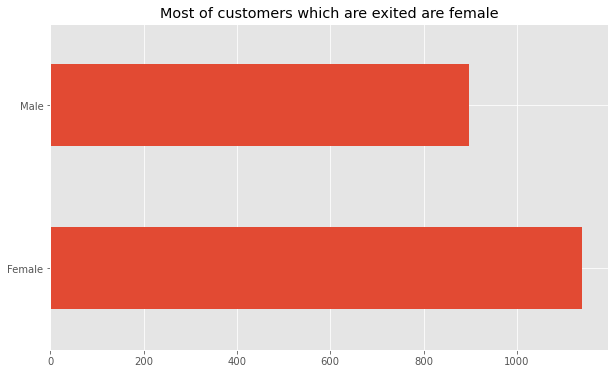

In [237]:
df[ df['Exited'] == 1]['Gender'].value_counts().plot(kind = "barh", title = "Most of customers which are exited are female"
                                                    ,figsize = (10,6))

Text(0.5, 1.0, "Distribution of the 'Tenure' column of the data is close to uniform distribution.")

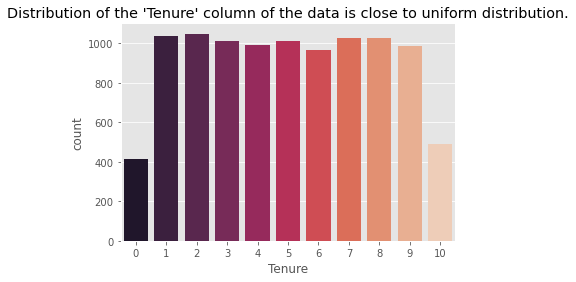

In [238]:
sns.countplot(data = df, x = "Tenure", palette = "rocket").set_title("Distribution of the 'Tenure' column of the data is close to uniform distribution.")

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

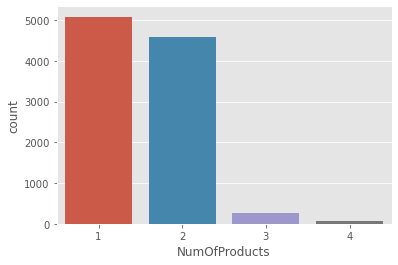

In [239]:
sns.countplot(data = df, x = "NumOfProducts")

In [240]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Mean of the CreditScore column: 650.5288
Median of the CreditScore column: 652.0
Mode of the CreditScore column: 850


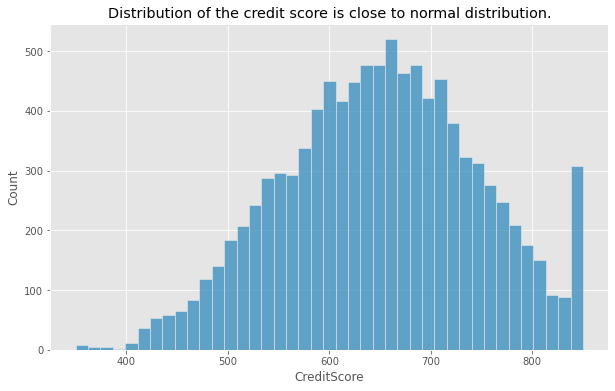

In [241]:
import statistics as stats
plt.figure(figsize = (10,6))
sns.histplot(data = df, x = "CreditScore").set_title("Distribution of the credit score is close to normal distribution.")
print("Mean of the CreditScore column:", df['CreditScore'].mean())
print("Median of the CreditScore column:", df['CreditScore'].median())
print("Mode of the CreditScore column:", stats.mode(df['CreditScore']))

<AxesSubplot:xlabel='Balance', ylabel='Density'>

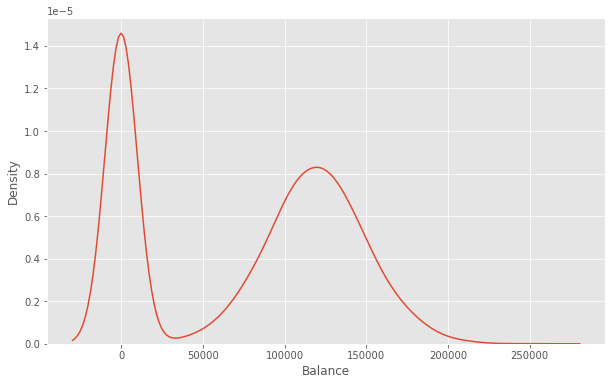

In [242]:
plt.figure(figsize = (10,6))
sns.kdeplot(data = df, x = "Balance")

In [243]:
label_encoder = LabelEncoder()
#df.drop("Surname", axis = 1, inplace = True)

In [244]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:>

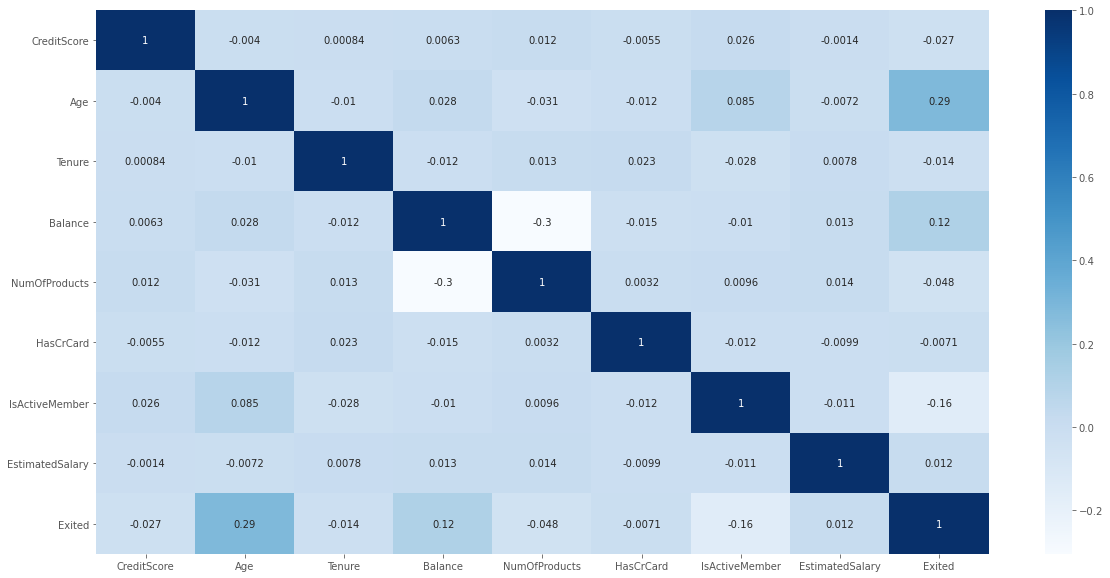

In [245]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, cmap= "Blues")

Max age: 92
Min age: 18
Mean of the age column: 38.9218
Median of the age column: 37.0
Mode of the age column: 37
Standard deviation of the age column: 10.48780645170461


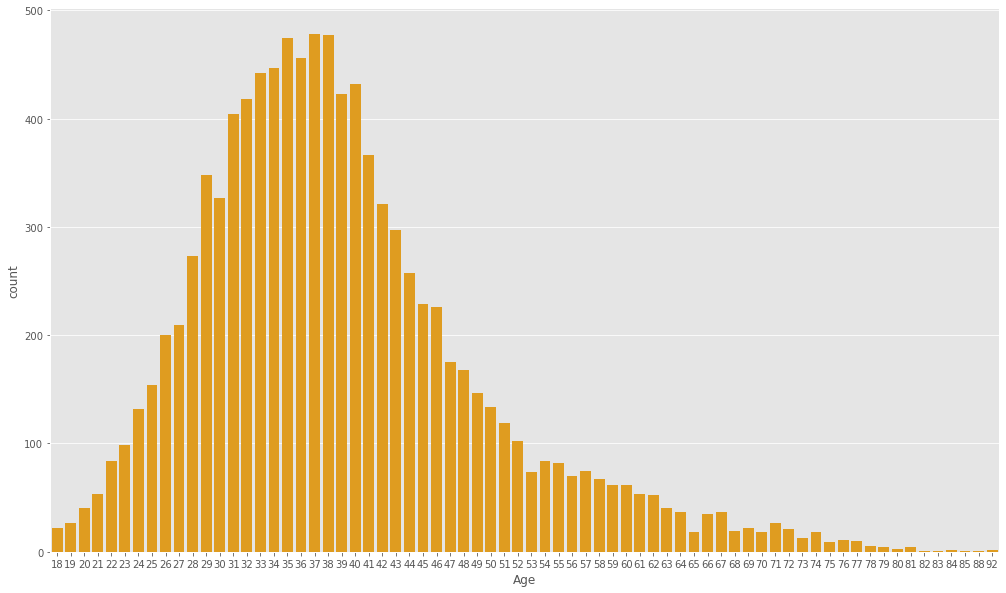

In [246]:
plt.figure(figsize = (17,10))
sns.countplot(data = df , x = "Age", color ="orange")
print("Max age:", df['Age'].max())
print("Min age:", df['Age'].min())
print("Mean of the age column:", df['Age'].mean())
print("Median of the age column:", df['Age'].median())
print("Mode of the age column:", stats.mode(df['Age']))
print("Standard deviation of the age column:", stats.stdev(df['Age']))

<Figure size 1440x720 with 0 Axes>

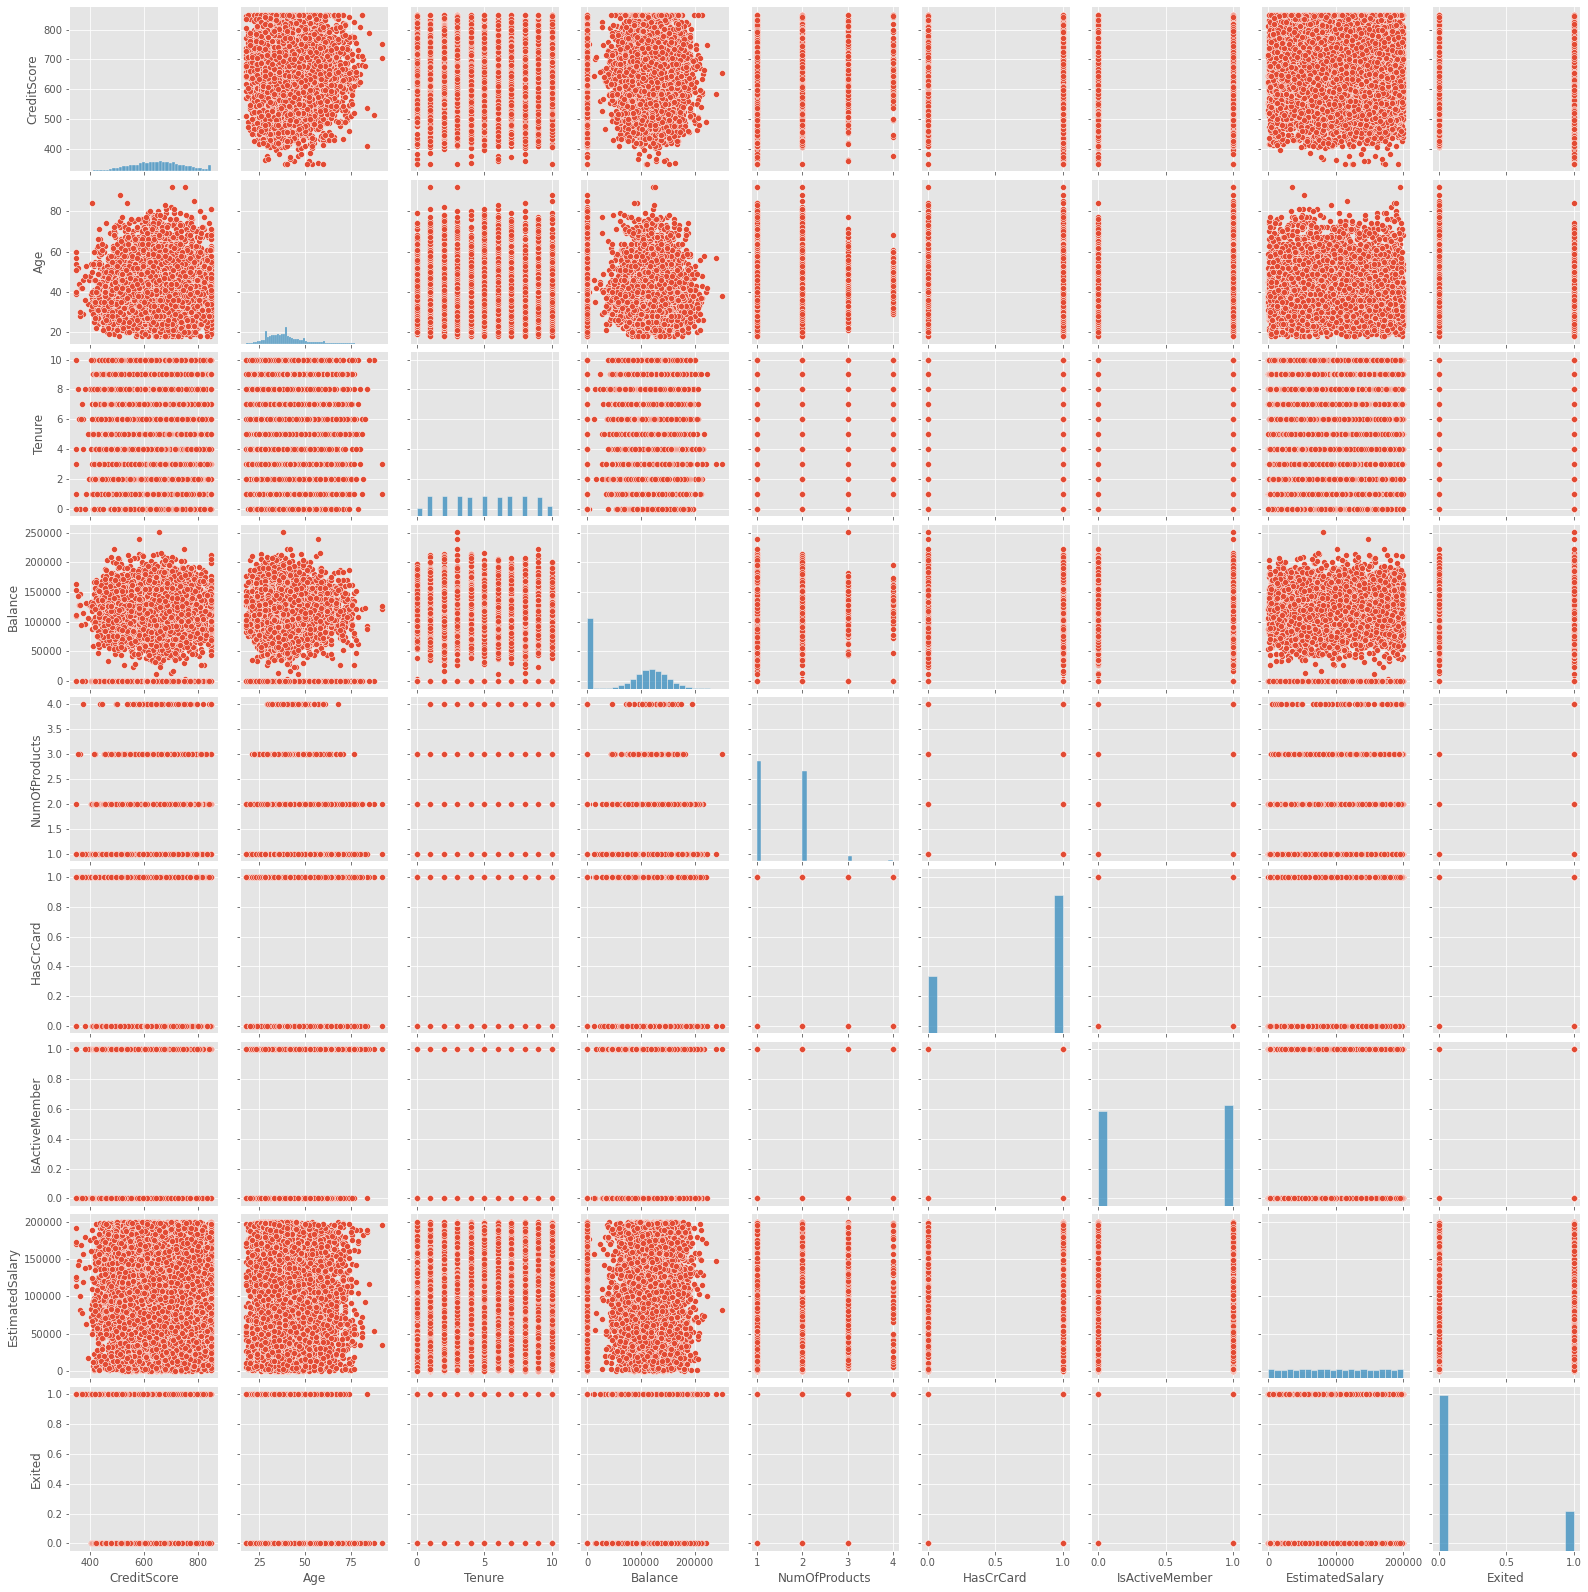

In [247]:
plt.figure(figsize = (20,10))
sns.pairplot(df)

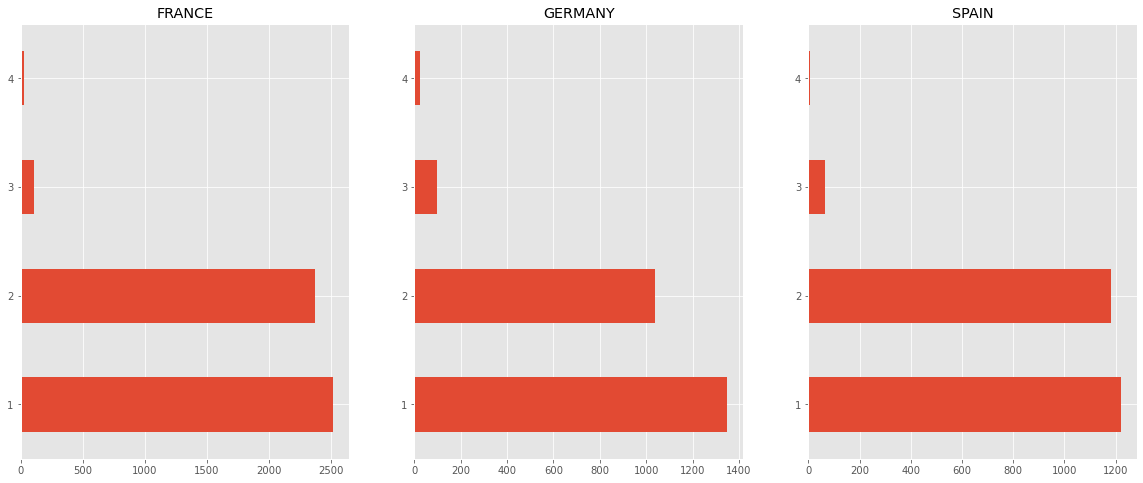

In [248]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1,ncols = 3, figsize=(20,8))
df[ df['Geography'] == "France"]['NumOfProducts'].value_counts().plot(kind = "barh", ax = ax1, title = "FRANCE")
df[ df['Geography'] == "Germany"]['NumOfProducts'].value_counts().plot(kind = "barh", ax = ax2, title = "GERMANY")
df[ df['Geography'] == "Spain"]['NumOfProducts'].value_counts().plot(kind = "barh", ax = ax3, title = "SPAIN")
plt.show()

In [249]:
df.drop("Surname", axis = 1, inplace = True)

In [250]:
df.head()
df.shape

(10000, 11)

In [251]:
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]


In [252]:
df['Age'].sort_values(ascending = False)

6443    92
6759    92
2458    88
3033    85
3387    84
        ..
9782    18
2141    18
9501    18
9520    18
1619    18
Name: Age, Length: 10000, dtype: int64

In [253]:
df.groupby("Age").agg({'EstimatedSalary':'mean'}).T

Age,18,19,20,21,22,23,24,25,26,27,...,78,79,80,81,82,83,84,85,88,92
EstimatedSalary,85102.389545,97734.10037,97705.542,102536.673774,98321.615476,110148.368485,107179.807424,98793.466688,102439.5115,101110.525742,...,115279.474,152474.975,96189.52,56863.9575,182055.36,92934.41,187360.25,116537.96,52952.24,115000.41


In [254]:
encoder = LabelEncoder()
scaler = MinMaxScaler()
def object_processer(data):
    for col in data.select_dtypes("O").columns:
        df[col] = encoder.fit_transform(df[col])
    for col2 in data.columns:
        df[col2] = scaler.fit_transform(df[col2].values.reshape(-1,1))

In [255]:
object_processer(df)

In [256]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


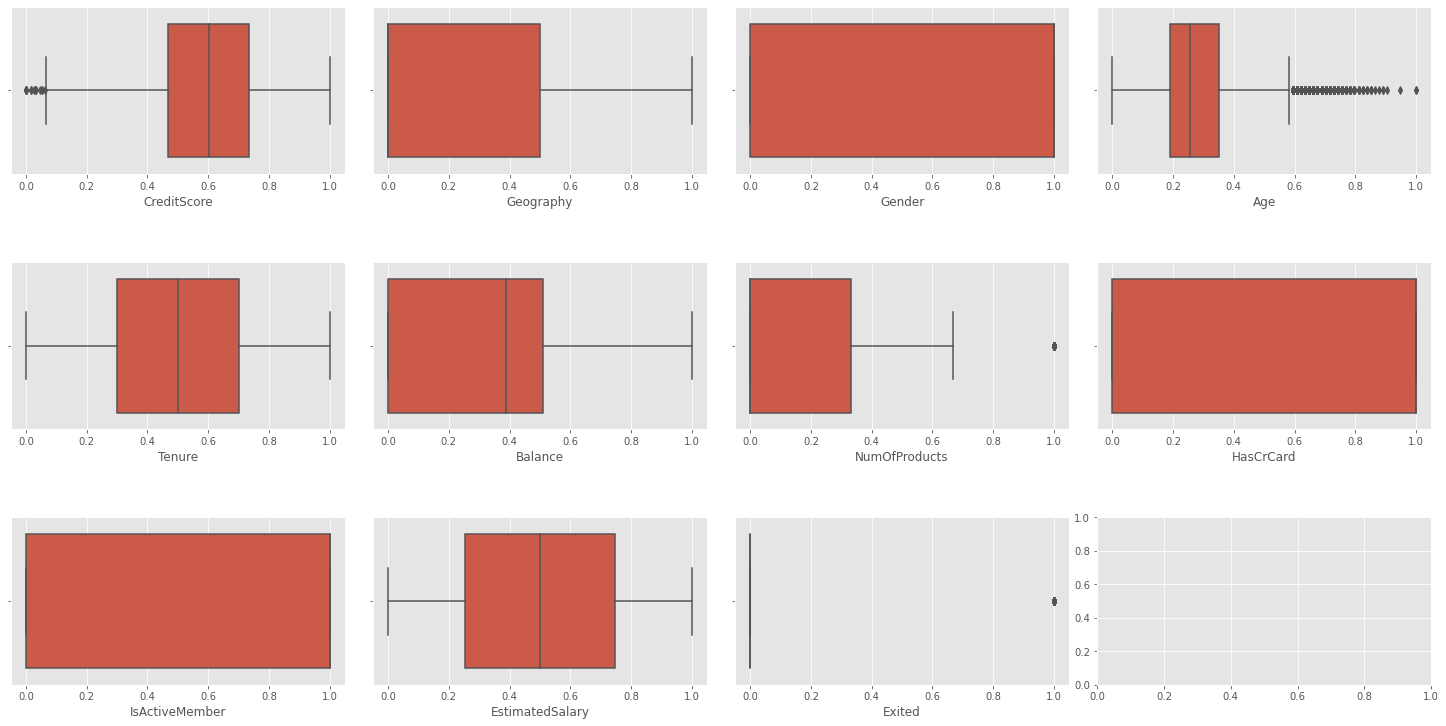

In [257]:
fig, axis = plt.subplots(nrows = 3, ncols = 4, figsize = (20,10))
index = 0
axis = axis.flatten()
for x in df.columns:
    sns.boxplot(data = df, x = x, ax = axis[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Completion of the Exploratory Data Analysis

 * Most of the outliers can be ignored. Anyone's age can be higher than 60.
 * The product shown as 1 is the most bought feature regardless of the country.
 * Customer's age are normally distributed(balanced, expectful data. no skewness).
 * All the features are not in correlation with each other.
 * Most of the customers are from France.
 * Company has customers from all economic conditions.
 * In total, male customers are more than female customers but most of the exited customers are female.

## PREDICTION

In [258]:
x = df.drop('Exited', axis = 1).values
y = df['Exited'].values
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.25, random_state = 42)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


In [259]:
import tensorflow as tf
x.shape

(10000, 10)

In [260]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(6, activation = "relu", input_shape = [x.shape[1],]))
model.add(tf.keras.layers.Dense(6, activation = "relu"))
model.add(tf.keras.layers.Dense(units = 2, activation = "sigmoid"))

In [261]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics= ['accuracy'])

In [262]:
model.fit(x_train, y_train, batch_size = 128, epochs = 75)

Epoch 1/75
59/59 [==============================] - 0s 526us/step - loss: 0.6199 - accuracy: 0.7279
Epoch 2/75
59/59 [==============================] - 0s 492us/step - loss: 0.5342 - accuracy: 0.7947
Epoch 3/75
59/59 [==============================] - 0s 553us/step - loss: 0.5057 - accuracy: 0.7947
Epoch 4/75
59/59 [==============================] - 0s 537us/step - loss: 0.4997 - accuracy: 0.7947
Epoch 5/75
59/59 [==============================] - 0s 526us/step - loss: 0.4949 - accuracy: 0.7947
Epoch 6/75
59/59 [==============================] - 0s 525us/step - loss: 0.4905 - accuracy: 0.7947
Epoch 7/75
59/59 [==============================] - 0s 531us/step - loss: 0.4863 - accuracy: 0.7947
Epoch 8/75
59/59 [==============================] - 0s 517us/step - loss: 0.4829 - accuracy: 0.7947
Epoch 9/75
59/59 [==============================] - 0s 553us/step - loss: 0.4796 - accuracy: 0.7947
Epoch 10/75
59/59 [==============================] - 0s 598us/step - loss: 0.4767 - accuracy: 0.7947

In [263]:
results = model.evaluate(x_test, y_test, batch_size= 128)

20/20 [==============================] - 0s 429us/step - loss: 0.3801 - accuracy: 0.8448


In [264]:
ann_test_result = results[1]
ann_test_result

0.8447999954223633

In [265]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [266]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors' : np.arange(1,50,1)}
knn_cv = GridSearchCV(knn, knn_params, cv = 10)
knn_cv.fit(x_train, y_train)
knn_cv.best_params_
knn_tuned = KNeighborsClassifier(n_neighbors= 10)
knn_tuned.fit(x_train, y_train)
knn_score = accuracy_score(y_test, knn_tuned.predict(x_test))
print("KNN Score is:", knn_score)

KNN Score is: 0.8208


In [267]:
!pip install xgboost

In [268]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
params = {
    "colsample_bytree": (0.7, 0.3),
    "gamma": (0, 0.5),
    "learning_rate": (0.03, 0.3), # default 0.1 
    "max_depth": (2, 6), # default 3
    "n_estimators": (100, 150), # default 100
    "subsample": (0.6, 0.4)
}
search = RandomizedSearchCV(xgb_model, param_distributions=params, 
                            random_state=42, n_iter=200, cv=3, verbose=0, n_jobs=1, return_train_score=True)
search.fit(x_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [269]:
xgb_accuracy = accuracy_score(y_test,search.predict(x_test))
xgb_accuracy

0.8684

In [270]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_params = {'max_depth' : np.arange(1,25, 1)}
dtc_tuned = GridSearchCV(dtc, dtc_params, cv = 10, verbose = 2, n_jobs= -1)
dtc_tuned.fit(x_train, y_train)
decision_tree_accuracy = accuracy_score(y_test, dtc_tuned.predict(x_test))
print(dtc_tuned.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'max_depth': 5}


In [271]:
from sklearn.svm import SVC
linear_svc = SVC(kernel= "linear")
linear_svc_params = {'C' : np.arange(1,10,1)}
linear_svc_tuned = GridSearchCV(linear_svc, linear_svc_params, cv = 10, verbose = 2, n_jobs= -1)
linear_svc_tuned.fit(x_train, y_train)
svc_linear_accuracy = accuracy_score(y_test, linear_svc_tuned.predict(x_test))
print(linear_svc_tuned.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'C': 1}


In [272]:
svc = SVC(kernel = "rbf")
svc_params = {'C' : [0.1, 0.001, 0.5, 1, 0.2, 5, 10], "gamma":[1,5,7,10,15,25,50]}
svc_tuned = GridSearchCV(svc, svc_params, cv = 10, verbose = 2, n_jobs= -1)
svc_tuned.fit(x_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.001, 0.5, 1, 0.2, 5, 10],
                         'gamma': [1, 5, 7, 10, 15, 25, 50]},
             verbose=2)

In [273]:
svc_unlinear_accuracy = accuracy_score(y_test, svc_tuned.predict(x_test))
print(svc_tuned.best_params_)

{'C': 5, 'gamma': 1}


In [274]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes.predict(x_test))

<BarContainer object of 7 artists>

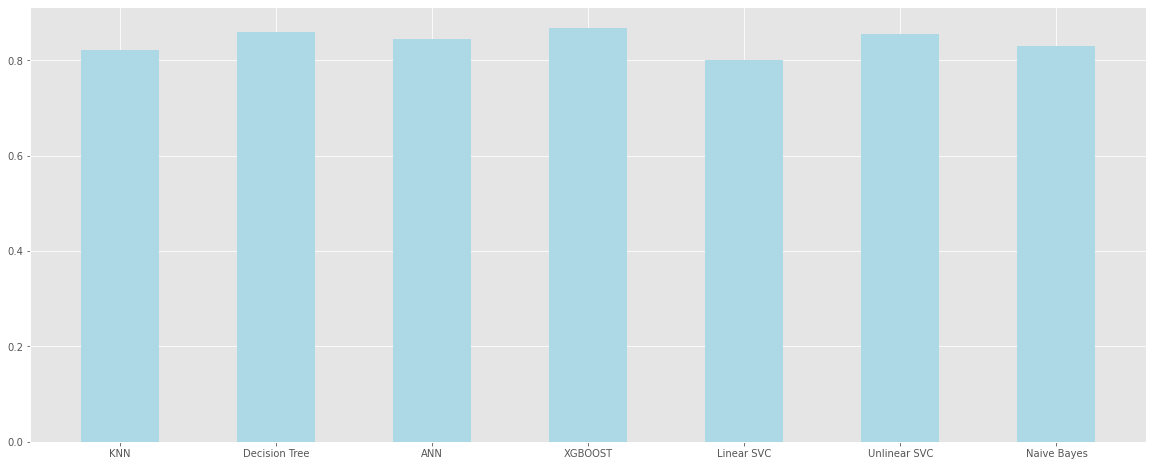

In [275]:
algorithms = ['KNN', 'Decision Tree', 'ANN', 'XGBOOST', 'Linear SVC', 'Unlinear SVC', 'Naive Bayes']
results = [knn_score, decision_tree_accuracy, ann_test_result, xgb_accuracy, svc_linear_accuracy, svc_unlinear_accuracy, naive_bayes_accuracy ]
plt.figure(figsize=(20,8))
plt.bar(algorithms, results, color ='lightblue',
        width = 0.5)

In [278]:
(df[ df['Exited'] == 1].shape[0]* 100) / df.shape[0]

20.37

In [279]:
(df[ df['Exited'] == 0].shape[0]* 100) / df.shape[0]

79.63